<a href="https://colab.research.google.com/github/posamswetha01/TYL_DS_P-SWETHA/blob/main/Text_analysis_using_topic_prediction_ass_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=db74565016dfcb33bae6e8c6db993cfc204a76e091b7d46f68963ee87d5a32d6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=934f59340a7bcb6431fd5a3a4094117c046ee259dc877e0aa0a03b0c813a8a1c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re
import gensim
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import sys
import nltk
from nltk.corpus import stopwords
from gensim.models import ldamodel
import gensim.corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
import numpy as np 
import pandas as pd
import string
import re
from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm
from collections import Counter,OrderedDict
from gensim import models,corpora
from gensim.summarization import summarize,keywords
import warnings
# import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns

import gensim.models.phrases as gen
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
data=pd.read_csv('/content/articles.csv')
len(data)

337

In [ ]:
data.head(5)

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


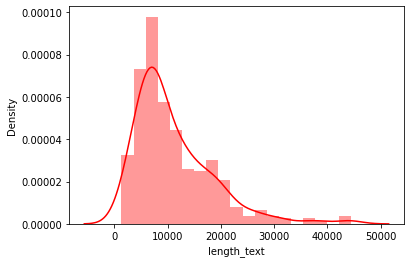

In [ ]:
data['length_text'] = data['text'].str.len()
sns.distplot(data['length_text'], color="r")
plt.show()

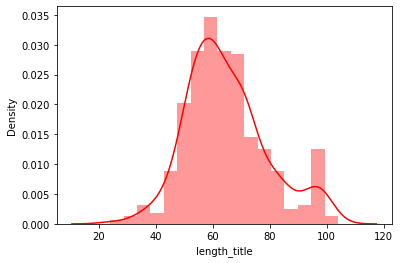

In [ ]:
data['length_title'] = data['title'].str.len()
sns.distplot(data['length_title'], color="r")
plt.show()

In [ ]:

titles = [x for x in data['title']]
docs = [x for x in data['text']]

In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# A function to prepare the text for topic modelling
def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in stop_words]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

In [ ]:

nltk.download('all')
docs = [words(x) for x in data['text']]

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))


Number of unique words in initital documents: 18975
Number of unique words after removing rare and common words: 2720


In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
#print(len(corpus))
#corpus[336]
bow_doc_300 = corpus[300]

for i in range(len(bow_doc_300)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_300[i][0], 
                                                     dictionary[bow_doc_300[i][0]], 
                                                     bow_doc_300[i][1]))


Word 47 ("close") appears 1 time.
Word 51 ("command") appears 1 time.
Word 65 ("cool") appears 1 time.
Word 121 ("gate") appears 1 time.
Word 189 ("multi") appears 1 time.
Word 213 ("predicted") appears 1 time.
Word 247 ("scene") appears 1 time.
Word 281 ("terminal") appears 1 time.
Word 321 ("column") appears 6 time.
Word 339 ("excellent") appears 1 time.
Word 370 ("matrix") appears 1 time.
Word 431 ("www") appears 1 time.
Word 434 ("additional") appears 1 time.
Word 455 ("collection") appears 3 time.
Word 489 ("github") appears 1 time.
Word 503 ("irrelevant") appears 1 time.
Word 506 ("learning”") appears 1 time.
Word 535 ("ready") appears 1 time.
Word 538 ("relationship") appears 3 time.
Word 571 ("“deep") appears 1 time.
Word 579 ("andrew") appears 1 time.
Word 617 ("guess") appears 1 time.
Word 652 ("neuron") appears 4 time.
Word 736 ("comprehensive") appears 1 time.
Word 767 ("enables") appears 1 time.
Word 774 ("explanation") appears 1 time.
Word 777 ("faced") appears 1 time.
Wo

In [ ]:

def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [ ]:
get_lda_topics(lda_model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,652,1862,1413,601,1062,28,728,420,998,734
1,711,397,1524,2218,716,63,2117,840,2376,1454
2,370,2025,1714,408,823,2278,1647,1456,2361,29
3,1047,20,252,1869,2473,1097,725,1094,915,2434
4,661,1041,1430,265,236,850,1608,315,974,998
5,823,1461,846,2534,1381,12,423,868,1773,2626
6,1543,360,10,2714,810,152,765,1401,901,2427
7,2584,479,1060,1611,2235,48,2127,1446,343,2325
8,1639,386,2579,950,837,236,262,934,939,2436
9,717,1111,1539,2119,1199,44,1410,915,2363,431


In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
lda_model.save('model10.gensim')
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.019*"652" + 0.010*"711" + 0.009*"370" + 0.008*"1047" + 0.008*"661" + 0.008*"823"')
(1, '0.017*"1862" + 0.015*"397" + 0.012*"2025" + 0.011*"20" + 0.010*"1041" + 0.010*"1461"')
(2, '0.010*"1413" + 0.010*"1524" + 0.009*"1714" + 0.009*"252" + 0.009*"1430" + 0.008*"846"')
(3, '0.034*"601" + 0.014*"2218" + 0.012*"408" + 0.011*"1869" + 0.009*"265" + 0.009*"2534"')
(4, '0.014*"1062" + 0.012*"716" + 0.008*"823" + 0.007*"2473" + 0.007*"236" + 0.007*"1381"')
(5, '0.011*"28" + 0.006*"63" + 0.005*"2278" + 0.005*"1097" + 0.005*"850" + 0.004*"12"')
(6, '0.011*"728" + 0.010*"2117" + 0.008*"1647" + 0.008*"725" + 0.007*"1608" + 0.006*"423"')
(7, '0.023*"420" + 0.009*"840" + 0.008*"1456" + 0.007*"1094" + 0.007*"315" + 0.006*"868"')
(8, '0.020*"998" + 0.018*"2376" + 0.016*"2361" + 0.015*"915" + 0.015*"974" + 0.011*"1773"')
(9, '0.095*"734" + 0.035*"1454" + 0.035*"29" + 0.034*"2434" + 0.021*"998" + 0.020*"2626"')
